In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
!pip install scikit-learn

In [3]:
# Importacion de las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')
X, Y = mnist["data"], mnist["target"]

In [4]:
class Perceptron(object):
    """ Clasificador perceptrón

    Parámetros
    ----------
    eta : float
        Taza de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Pasos sobre la muestra de entrenamiento
    random_state : int
        Semilla generadora de número aleatorio para la inicialización de pesos aleatorios
    init_weigt: boolean
        Forma de inicializar los pesos
    weights: list[int]
        Pesos iniciales
    shuffle: boolean
        Indica el orden los ejemplos de entreanaiento
    f_activate: string
        Indica la función de activación

    Atributos
    ---------
    w_: arreglo de 1-d
        Pesos después de entrenamiento
    errors_ : list
        Número de clasificaciones incorrectas (actualizaciones) en cada época

    """

    def __init__(self, eta=0.5, n_iter=15, random_state=1, init_weigt=True, weights=None, shuffle=True,
                 f_activate='sing'):
        if weights is None:
            self.weights = []
        else:
            self.weights = weights
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.init_weigt = init_weigt
        self.shuffle = shuffle
        self.f_activate = f_activate
        self.w_ = np.array([])
        self.errors_ = []

    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento

        Parámetros
        ----------
        X :
            Vector de entrenamiento
        y:
            Valores objetivo

        Returns
        -------
        self : object

        """
        # Se inicializa los pesos de forma aleatoria
        if self.init_weigt and len(self.weights) == 0:
            # Se crea un generador de números aleatorios con una semilla dada
            rgen = np.random.RandomState(self.random_state)
            # Inicializa los pesos de la red neuronal con valores aleatorios generados por la semilla
            # se aumenta un 1 para colocar el bias
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif self.init_weigt and len(self.weights) > 0:
            self.w_ = np.array([*self.weights])
        else:
            # Se colocan 0's en el peso
            self.w_ = np.zeros(1 + X.shape[1])
        # bias + la dimension de X
        X_copy = np.ones((X.shape[0], X.shape[1] + 1))
        X_copy[:, 1:] = X
        X = X_copy
        cont = 0

        if self.n_iter > 0:
            # épocas
            for epoch in range(self.n_iter):
                self.train(X, y)
                # Se añade a la lista el número de clasificaciones incorrectas por época
                self.errors_.append(self.evaluation(X, y))
        else:
            self.errors_.append(0)
            while True:
                self.train(X, y)
                # Contador para obtener la cantidad de épocas realizadas
                cont += 1
                # Se añade a la lista el número de clasificaciones incorrectas por época
                self.errors_.append(self.evaluation(X, y))
                # Si es cero el error ha aprendido todos los ejemplos de entrenamiento
                if self.errors_[len(self.errors_)-1] == 0:
                    break
        # Grafica de errores
        print("\n")
        plt.rcParams["figure.figsize"] = (7, 7)
        if self.n_iter > 0:
            plt.scatter([xx for xx in range(self.n_iter)], self.errors_, marker=('o'))
            plt.plot([xx for xx in range(self.n_iter)], self.errors_)
        else:
            plt.scatter([xx for xx in range(cont)], self.errors_, marker=('o'))
            plt.plot([xx for xx in range(cont)], self.errors_)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title("Errores en Experimento")
        plt.grid()
        plt.show()
        print("\n")
        return self

    def evaluation(self, X, y):
        """Prueba de los datos una vez que el entrenamiento se ha realizado"""
        clasificaciones_incorrectas = 0
        for fila in range(X.shape[0]):
            y_gorro = self.predict(self.w_.T.dot(X[fila, :]))
            if y_gorro != y[fila]:
                clasificaciones_incorrectas += 1
        return clasificaciones_incorrectas

    def train(self, X, y):
        """ Entrenamiento de los datos de entrada con sus etiquetas correspondientes"""
        # Entrenamiento
        if self.shuffle:
            # Unir las etiquetas y X para aplicar el shuffle y después separarlas
            X_copy = np.ones((X.shape[0], X.shape[1] + 1))
            X_copy[:, 0:X.shape[1]] = X
            X_copy[:, X.shape[1]] = y
            np.random.shuffle(X_copy)
            # Se recuperan el bias, las caracteristicas y el target
            X2 = X_copy[:, 0:X.shape[1]]
            Y2 = X_copy[:, X.shape[1]]
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.w_)
                a = self.predict(z)
                self.w_ += self.eta * (Y2[i] - a) * X2[i]
        else:
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.w_)
                a = self.predict(z)
                self.w_ += self.eta * (y[i] - a) * X[i]

    def predict(self, etiqueta):
        """ Retorna la etiqueta de clase después de aplicar la función"""
        if self.f_activate == "sign":
            if etiqueta >= 0:
                return 1.0
            else:
                return -1.0
        # step
        else:
            if etiqueta >= 0:
                return 1.0
            else:
                return 0.0



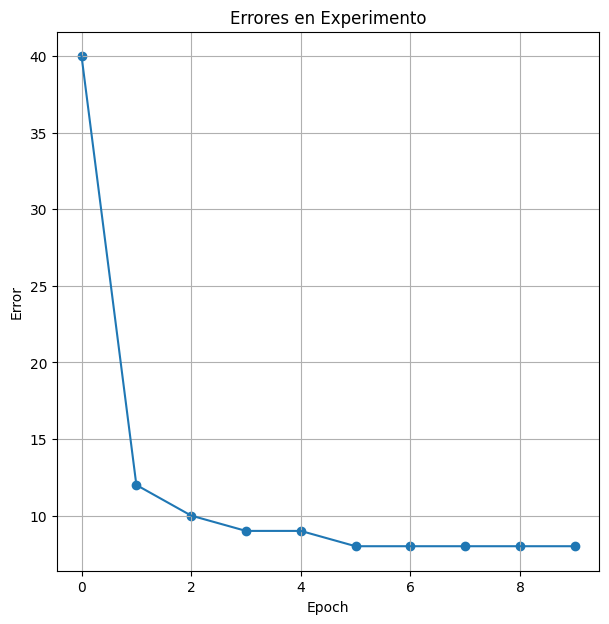



resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido

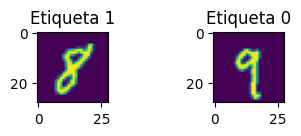

In [11]:
#Experimento 1

# Instanciación del objeto
perceptron = Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0)


# Datos del conjunto, se obtienen 100 imagenes de la clase 8
X_8 = X[Y == '8']
# se asignan los datos de la clase 9
X_9 = X[Y == '9']


X_train = np.concatenate([X_8[:50], X_9[:50]], axis=0)
X_test = np.concatenate([X_8[50:100], X_9[50:100]], axis=0)

# se crean las etiquetas
Y_ = np.ones((100,))
Y_[50:100,] = 0

# Llamada a la función de entrenamiento con los datos de entrada
perceptron.fit(X_train, Y_)

# Entrenamiento
X_copy = np.ones((X_train.shape[0], X_train.shape[1] + 1))
X_copy[:, 1:] = X_train
X_bias = X_copy
number_of_correct_predictions = 0
for fila in range(X_bias.shape[0]):
    z = np.dot(X_bias[fila], perceptron.w_)
    y_gorro = perceptron.predict(z)
    if y_gorro == Y_[fila]:
        number_of_correct_predictions+=1
    print("resultado entrenamiento: valor esperado: ", Y_[fila], "valor obtenido: ", y_gorro)
# accuracy
print("Accuracy train : ",number_of_correct_predictions/X_train.shape[0] )

# Test
X_copy = np.ones((X_test.shape[0], X_test.shape[1] + 1))
X_copy[:, 1:] = X_test
X_bias = X_copy
number_of_correct_predictions = 0
for fila in range(X_bias.shape[0]):
    z = np.dot(X_bias[fila], perceptron.w_)
    y_gorro = perceptron.predict(z)
    if y_gorro == Y_[fila]:
        number_of_correct_predictions+=1
    print("resultado final: valor esperado: ", Y_[fila], "valor obtenido: ", y_gorro)



plt.rcParams["figure.figsize"] = (10, 6)
plt.subplots_adjust(wspace = 1.5)
# mostando imagenes a entrenear
imagenes = [X_train[0],X_train[70]]
etiquetas = [1,0]
for i in range(0,2):
    imgg = imagenes[i]
    img = imgg[:784].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.title("Etiqueta " + str(etiquetas[i]))
    plt.imshow(img)

# accuracy
print("Accuracy test : ",number_of_correct_predictions/X_test.shape[0] )



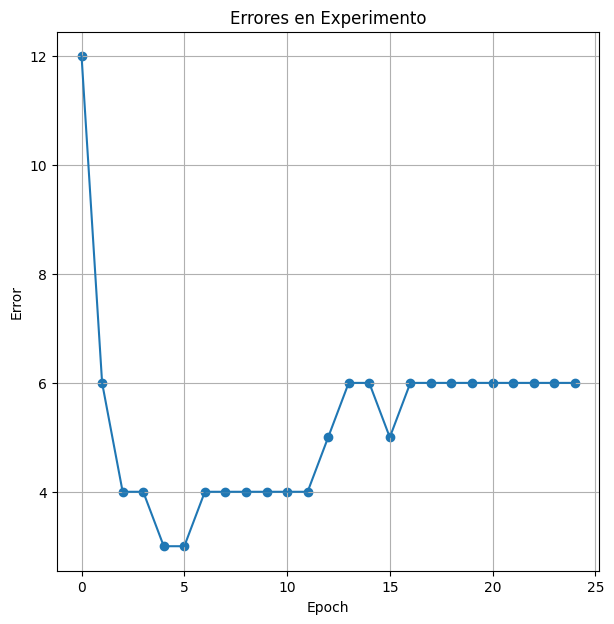



resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  0.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido:  1.0
resultado entrenamiento: valor esperado:  1.0 valor obtenido

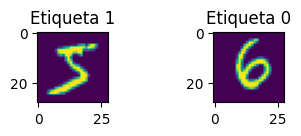

In [12]:
#Experimento 2

# Instanciación del objeto
perceptron = Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0)


# Datos del conjunto, se obtienen 100 imagenes de la clase 5
X_5 = X[Y == '5']
# se asignan los datos de la clase 6
X_6 = X[Y == '6']


X_train = np.concatenate([X_5[:50], X_6[:50]], axis=0)
X_test = np.concatenate([X_5[50:100], X_6[50:100]], axis=0)

# se crean las etiquetas
Y_ = np.ones((100,))
Y_[50:100,] = 0

# Llamada a la función de entrenamiento con los datos de entrada
perceptron.fit(X_train, Y_)

# Entrenamiento
X_copy = np.ones((X_train.shape[0], X_train.shape[1] + 1))
X_copy[:, 1:] = X_train
X_bias = X_copy
number_of_correct_predictions = 0
for fila in range(X_bias.shape[0]):
    z = np.dot(X_bias[fila], perceptron.w_)
    y_gorro = perceptron.predict(z)

    if y_gorro == Y_[fila]:
        number_of_correct_predictions+=1
    print("resultado entrenamiento: valor esperado: ", Y_[fila], "valor obtenido: ", y_gorro)
# accuracy
print("Accuracy train : ",number_of_correct_predictions/X_train.shape[0] )


# Test
X_copy = np.ones((X_test.shape[0], X_test.shape[1] + 1))
X_copy[:, 1:] = X_test
X_bias = X_copy
number_of_correct_predictions = 0
for fila in range(X_bias.shape[0]):
    z = np.dot(X_bias[fila], perceptron.w_)
    y_gorro = perceptron.predict(z)
    if y_gorro == Y_[fila]:
        number_of_correct_predictions+=1
    print("resultado final: valor esperado: ", Y_[fila], "valor obtenido: ", y_gorro)



plt.rcParams["figure.figsize"] = (10, 6)
plt.subplots_adjust(wspace = 1.5)
# mostando imagenes a entrenear
imagenes = [X_train[0],X_train[70]]
etiquetas = [1,0]
for i in range(0,2):
    imgg = imagenes[i]
    img = imgg[:784].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.title("Etiqueta " + str(etiquetas[i]))
    plt.imshow(img)

# accuracy
print("Accuracy test: ",number_of_correct_predictions/X_test.shape[0] )


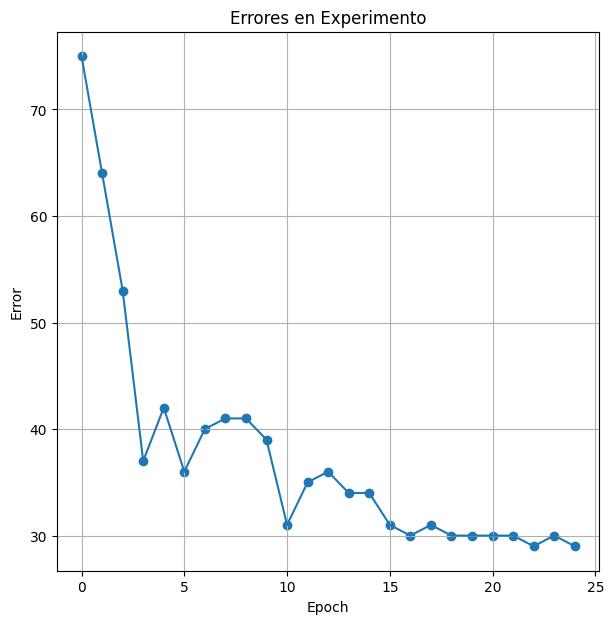

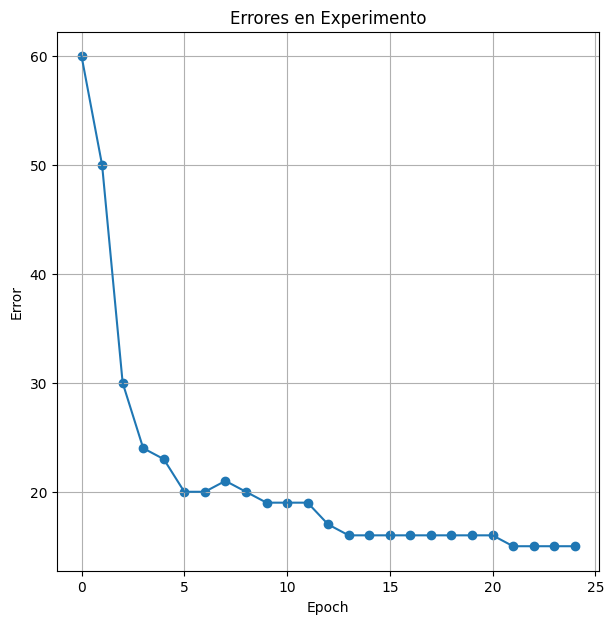

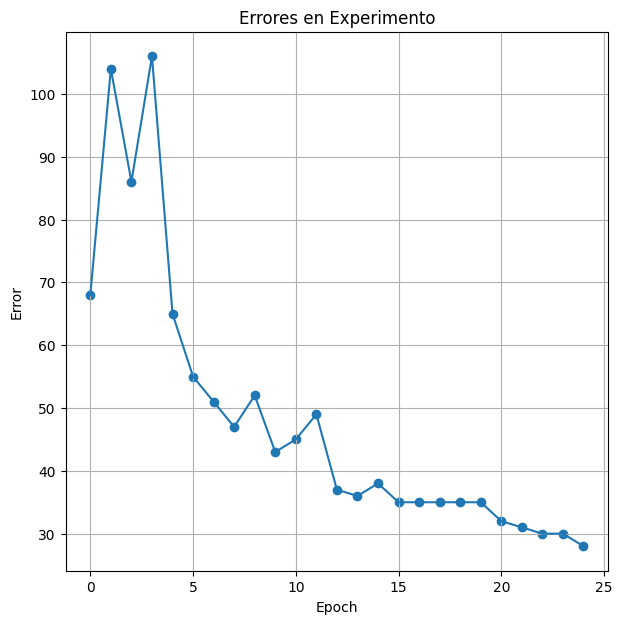

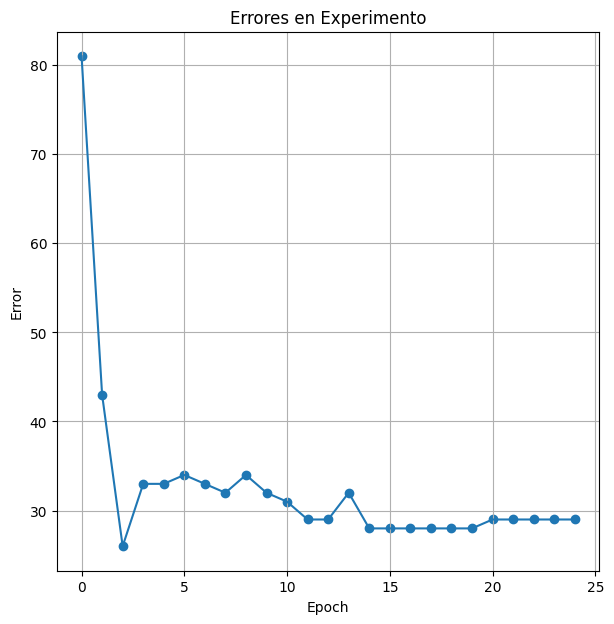

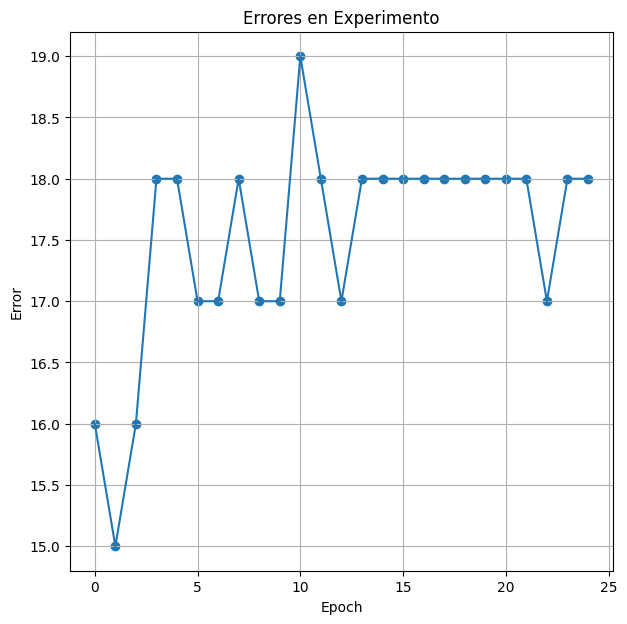

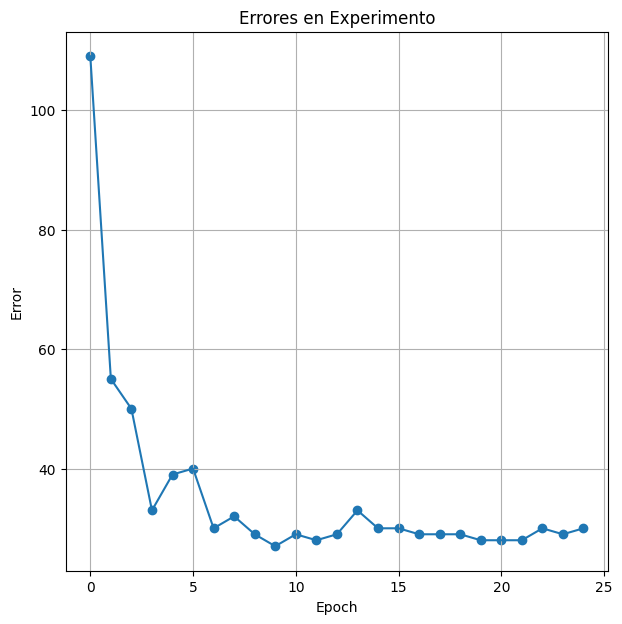

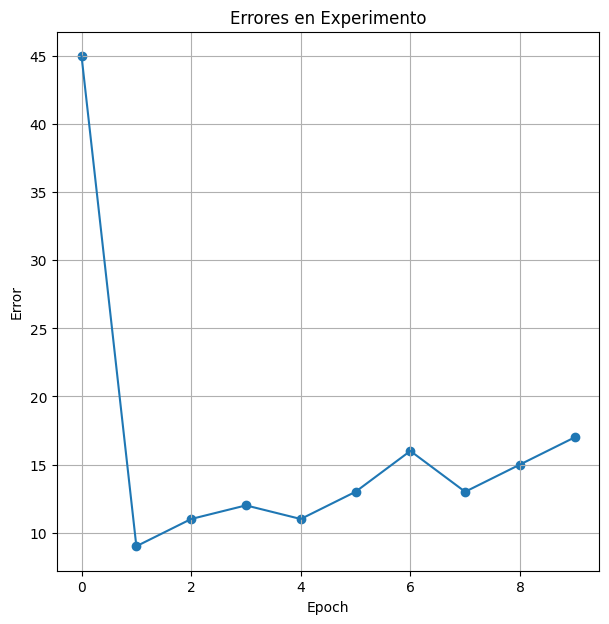

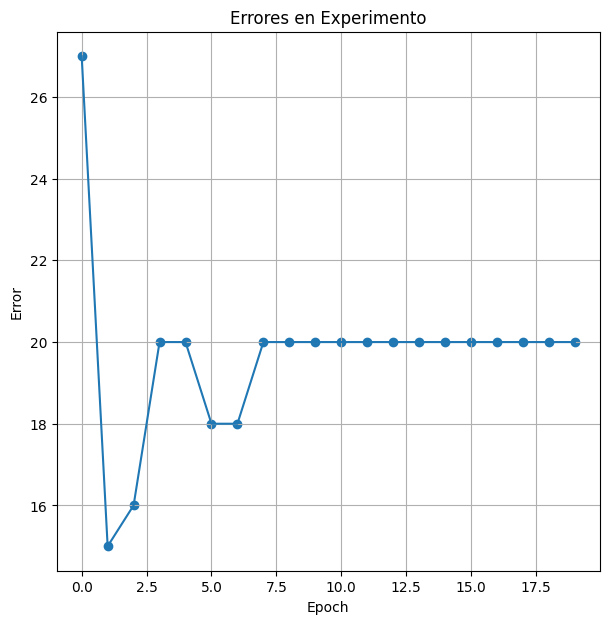

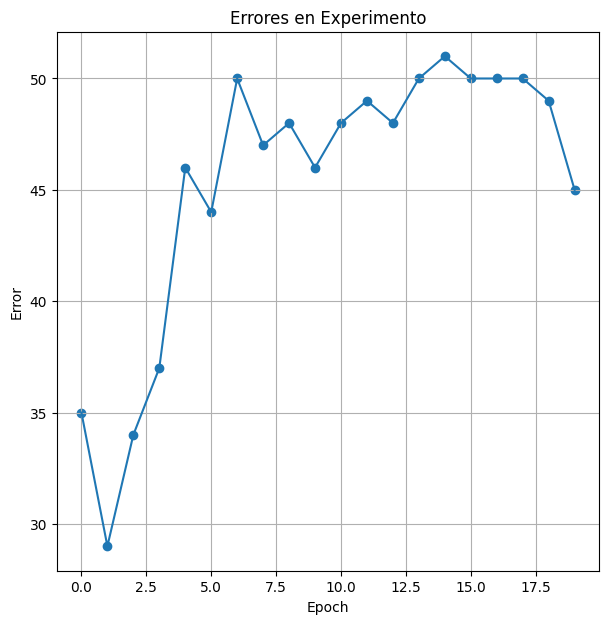

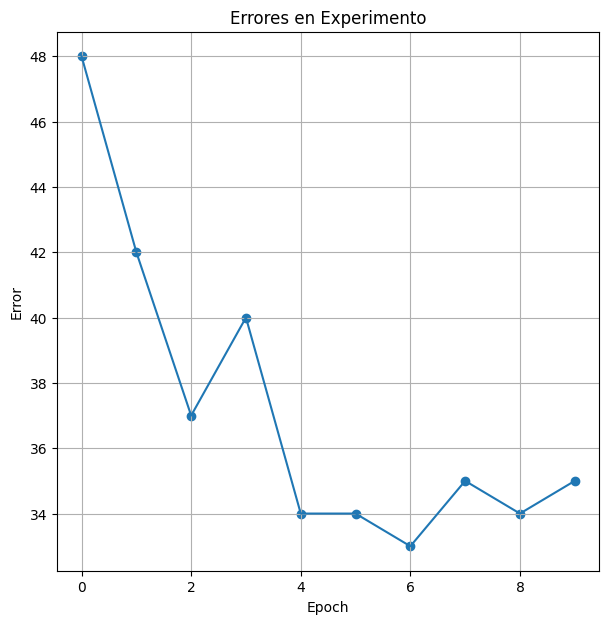

Se truncaron las últimas líneas 5000 del resultado de transmisión.
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  0.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  1.0
resultado final clase  0  vs all: valor esperado:  1.0 valor obtenido:  0.0
resultado final clase

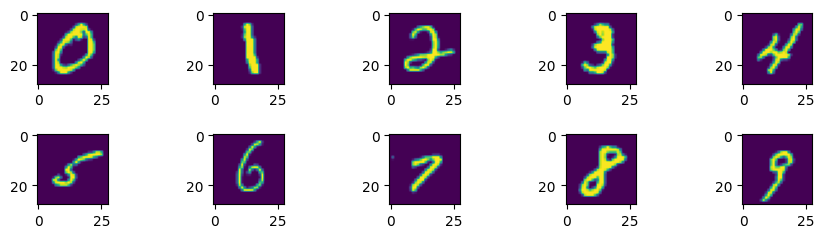

In [14]:
#Experimento 3


# Datos del conjunto, se obtienen 50 imagenes de cada clase
X_0 = X[Y == '0']
X_1 = X[Y == '1']
X_2 = X[Y == '2']
X_3 = X[Y == '3']
X_4 = X[Y == '4']
X_5 = X[Y == '5']
X_6 = X[Y == '6']
X_7 = X[Y == '7']
X_8 = X[Y == '8']
X_9 = X[Y == '9']


X_train = np.concatenate([X_0[:50],X_1[:50],X_2[:50],X_3[:50],X_4[:50],X_5[:50],
                        X_6[:50],X_7[:50],X_8[:50], X_9[:50]], axis=0)
X_test = np.concatenate([X_0[50:100],X_1[50:100],X_2[50:100],X_3[50:100],X_4[50:100],X_5[50:100],
                        X_6[50:100],X_7[50:100],X_8[50:100], X_9[50:100]], axis=0)


# Instanciación de los  objetos
perceptrones=[
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=25, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=20, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=20, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    Perceptron(f_activate="step", n_iter=10, init_weigt=True, shuffle=True,
                        eta=0.5,random_state=0),
    ]

Y_ = []
# se crean las etiquetas para las clases
YY = np.zeros((500,))
YY[0:50]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[50:100]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[100:150]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[150:200]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[200:250]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[250:300]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[300:350]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[350:400]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[400:450]=1
Y_.append(YY)

YY = np.zeros((500,))
YY[450:]=1
Y_.append(YY)

# Llamada a la función de entrenamiento con los datos de entrada

perceptrones[0].fit(X_train, Y_[0])
perceptrones[1].fit(X_train, Y_[1])
perceptrones[2].fit(X_train, Y_[2])
perceptrones[3].fit(X_train, Y_[3])
perceptrones[4].fit(X_train, Y_[4])
perceptrones[5].fit(X_train, Y_[5])
perceptrones[6].fit(X_train, Y_[6])
perceptrones[7].fit(X_train,Y_[7])
perceptrones[8].fit(X_train, Y_[8])
perceptrones[9].fit(X_train, Y_[9])

# Test
X_copy = np.ones((X_test.shape[0], X_test.shape[1] + 1))
X_copy[:, 1:] = X_test
X_bias = X_copy
number_of_correct_predictions=[]
for clase in range(10):
    number = 0
    Y_output = Y_[clase]
    for fila in range(X_bias.shape[0]):
        z = np.dot(X_bias[fila], perceptrones[clase].w_)
        y_gorro = perceptron.predict(z)
        if y_gorro == Y_output[fila]:
            number+=1
        print("resultado final clase ",clase," vs all: valor esperado: ", Y_output[fila], "valor obtenido: ", y_gorro)
    number_of_correct_predictions.append(number)

plt.rcParams["figure.figsize"] = (10, 6)
plt.subplots_adjust(wspace = 1.5)
#mostando imagenes a entrenear
imagenes = [X_train[0],X_train[51],X_train[101],X_train[151],X_train[201],X_train[251],X_train[301],X_train[351],X_train[401],X_train[451]]
for i in range(0,10):
    imgg = imagenes[i]
    img = imgg[:784].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.imshow(img)

# accuracy
for clase,dat in enumerate(number_of_correct_predictions):
    print("Accuracy clase : ",clase, " vs all",dat/X_test.shape[0])